In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
df = pd.read_csv( "Date and model wise sale.csv")
print("Initial Data Preview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Initial Data Preview:
         Date Model  Count
0  31-Aug-16   M45      5
1  31-Aug-16  M121      3
2  31-Aug-16  M122      4
3  31-Aug-16   M91     10
4  31-Aug-16   M66     57

Missing Values:
 Date     0
Model    0
Count    0
dtype: int64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
daily_sales = df.groupby('Date')['Count'].sum().reset_index()

In [13]:
X = daily_sales[['Days_Since_Start']]
y = daily_sales['Count']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.23393956961474838
MSE: 5170347.450373898


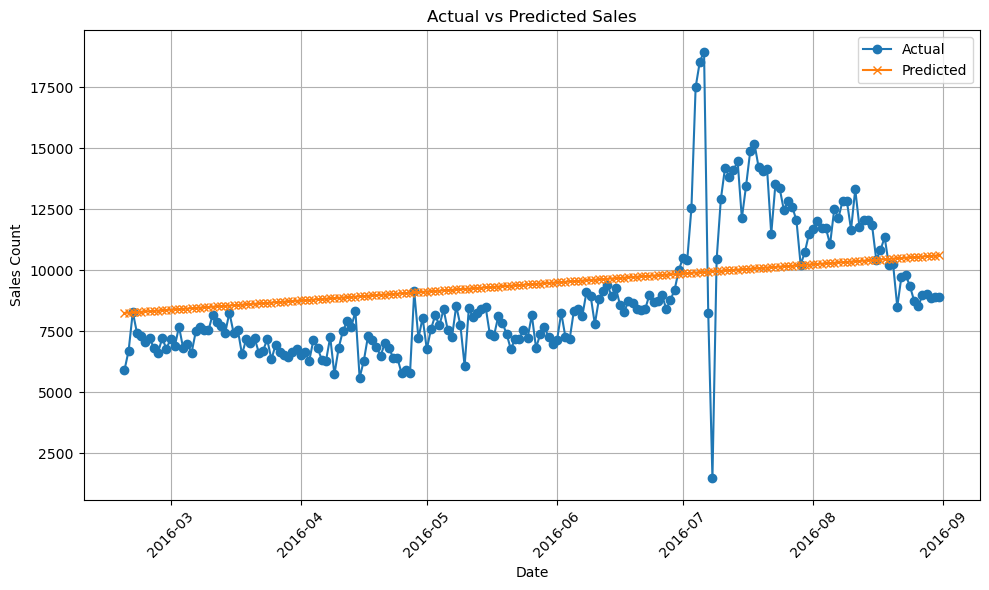

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'][-len(y_test):], y_test.values, label="Actual", marker='o')
plt.plot(daily_sales['Date'][-len(y_test):], y_pred, label="Predicted", marker='x')
plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
future_days = 30
last_day = daily_sales['Days_Since_Start'].max()
future_dates = pd.date_range(daily_sales['Date'].max() + pd.Timedelta(days=1), periods=future_days)
future_X = pd.DataFrame({'Days_Since_Start': range(last_day + 1, last_day + 1 + future_days)})
future_preds = model.predict(future_X)

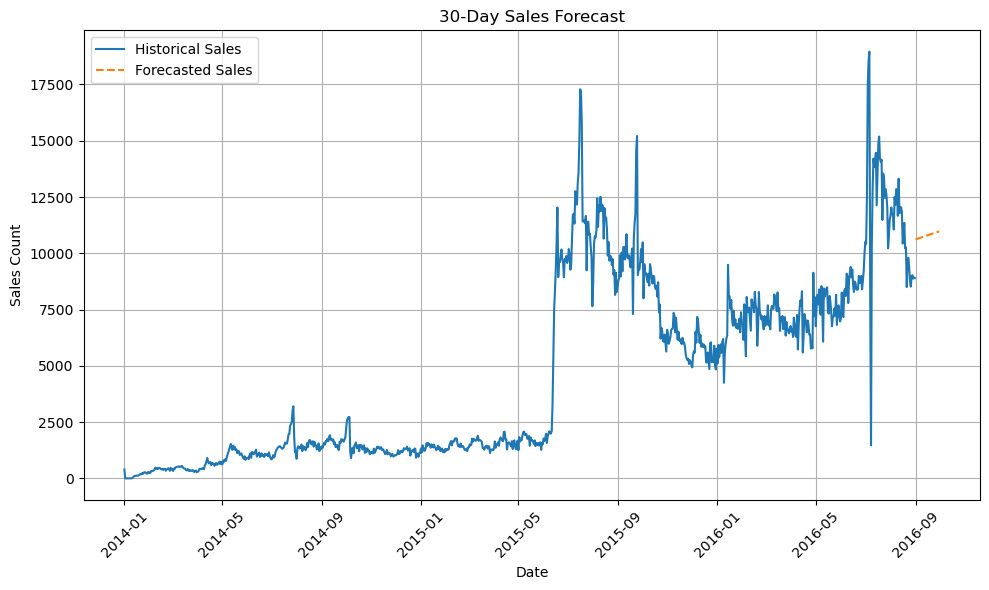

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], y, label="Historical Sales")
plt.plot(future_dates, future_preds, label="Forecasted Sales", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.title("30-Day Sales Forecast")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': future_preds.astype(int)})
print(forecast_df.head())

        Date  Forecasted_Sales
0 2016-09-01             10621
1 2016-09-02             10633
2 2016-09-03             10645
3 2016-09-04             10657
4 2016-09-05             10669
